- [Image Thresholding — OpenCV 3.0.0-dev documentation](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding)

In [1]:
import cv2  
import numpy as np  
from matplotlib import pyplot as plt 

### fixed thresholding

原始图片

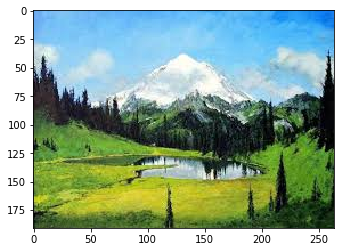

In [11]:
img = cv2.imread("landscape.jpeg")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img);

使用 fixed threhold，使用不用的截取方法

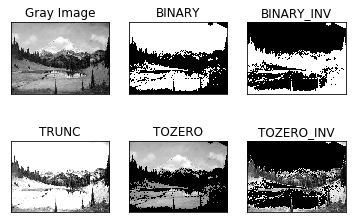

In [5]:
GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
ret,thresh1=cv2.threshold(GrayImage,127,255,cv2.THRESH_BINARY)  
ret,thresh2=cv2.threshold(GrayImage,127,255,cv2.THRESH_BINARY_INV)  
ret,thresh3=cv2.threshold(GrayImage,127,255,cv2.THRESH_TRUNC)  
ret,thresh4=cv2.threshold(GrayImage,127,255,cv2.THRESH_TOZERO)  
ret,thresh5=cv2.threshold(GrayImage,127,255,cv2.THRESH_TOZERO_INV)  
titles = ['Gray Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']  
images = [GrayImage, thresh1, thresh2, thresh3, thresh4, thresh5]  
for i in xrange(6):  
   plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()

### Otsu’s Binarization

对于一些具有双峰特征的图片，使用两个峰值之间的波谷位置作为阈值是一种合适的想法。opencv的 threshold() 方便地提供了这一方法。但是要注意的是，对于不具有双峰特点的图片来说，这种方法的效果并不好。

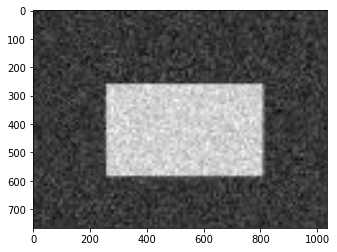

In [5]:
img = cv2.imread("noisy.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, "gray");

In [10]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

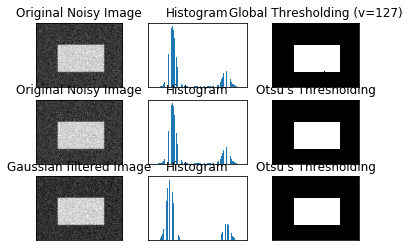

In [11]:
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

上图的效果并不是很明显，但是这里的逻辑是：
- 原始图片中存在一些噪音，使用降噪的方式将噪音去掉后，图片呈现明显的双峰的特性，这时使用 Otsu’s Binarization 就会有很好的效果

### adaptive thresholding

- [Adaptive Thresholding](http://hanzratech.in/2015/01/21/adaptive-thresholding.html)

- In adaptive threshold unlike fixed threshold, the threshold value at each pixel location depends on the neighboring pixel intensities.
- To calculate the threshold T(x, y) i.e. the threshold value at pixel location (x, y) in the image, we perform the following steps
    1. A bxb region around the pixel location is selected. b is selected by the user.
    2. The next step is to calculate the weighted average of the bxb region. OpenCV provides 2 methods to calculate this weighted average. We can either use the average (mean) of all the pixel location that lie in the bxb box or we can use a Gaussian weighted average of the pixel values that lie in the box. In the latter case, the pixel values that are near to the center of the box, will have higher weight. We will represent this value by WA(x, y).
    3. The next step is to find the Threshold value T(x, y) by subtracting a constant parameter, let’s name it param1 from the weighted average value WA(x, y) calculated for each pixel in the previous step. The threshold valueT(x, y) at pixel location (x, y) is then calculated using the formula given below  : T(x, y) = WA(x, y) - param1

- 可以使用两种 WA(x,y) 的计算方式
    - cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
    - cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
- 其他详细信息参考 opencv doc

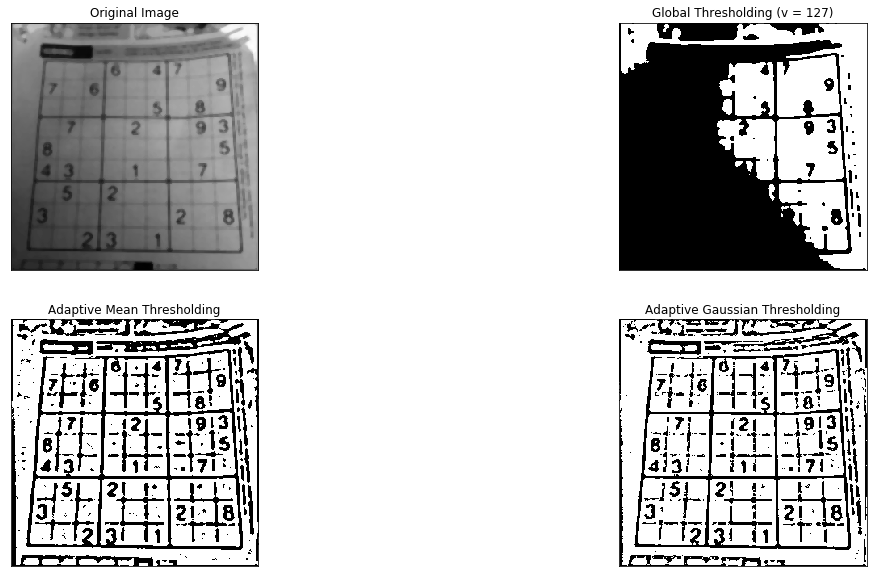

In [21]:
img = cv2.imread('homework.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # FIXED
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(20,10))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

上述的参数 11 是需要调整的，使用太多的会使得图片变得模糊。